<a href="https://colab.research.google.com/github/ps382njit/CNN-RNN-Assignment/blob/main/CNN_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Question 1 - Fashion MNIST Classification with RNNs

The images in MNIST data set are 28px by 28 px. So, we treat each image as a sequence of data- the first row is the first step, second row is the second step etc. Therefore, the n steps we take will equal number of rows and our n inputs will be the number of columns. And since RNN has numerous outputs, we only care about catching the last one.

In [ ]:
Question 2 RNN implementation

In [ ]:
import torch
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [ ]:
print(train_data.data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

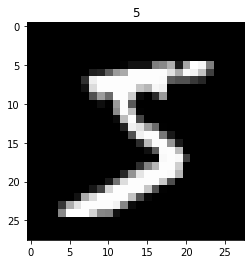

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

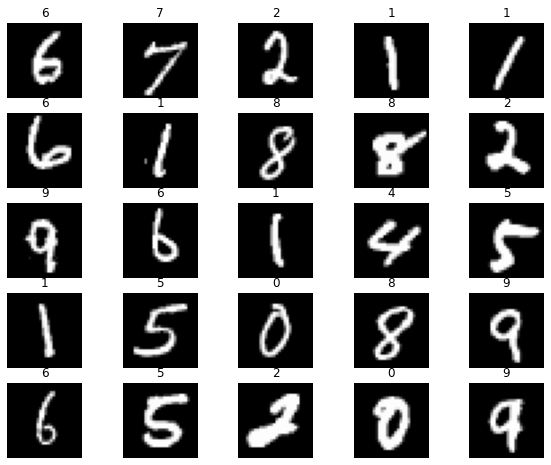

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f95f98bcbd0>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f95f98bcf50>}

In [ ]:
#RNN
from torch import nn
import torch.nn.functional as F

sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

#Class
class RNN(nn.Module):    pass
model = RNN().to(device)
print(model)

#Constructor
class RNN(nn.Module):
      def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

      def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Passing in the input and hidden state into the model and  obtaining outputs
        out, hidden = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)

        #Reshaping the outputs such that it can be fit into the fully connected layer
        out = self.fc(out[:, -1, :])
        return out
        
        pass

pass

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device).to(device)
print(model)

RNN()
RNN(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
#Loss
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [ ]:
def train(num_epochs, model, loaders):
        
    # Train the model
    total_step = len(loaders['train'])
        
    print(f"num_epochs: {num_epochs}")
    print(f"model: {model}")
    print(f"loaders['train']: {loaders['train']}")
    print("Started epoch: ")
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            print("epoch: ", epoch)
            print(f"images: {images}")
            print(f"labels: {labels}")
            
            images = images.reshape(-1, sequence_length, input_size).to(device)
            labels = labels.to(device)
            print(f"images after reshpae: {images}")
            
            # Forward pass
            outputs = model(images)
            loss = loss_func(outputs, labels)            
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))               
                pass
        
        pass
    print("Ended epoch: ")
    pass
    
train(num_epochs, model, loaders)

Streaming output truncated to the last 5000 lines.
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0.

In [ ]:
# Test the model
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loaders['test']:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()
        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


sample = next(iter(loaders['test']))
imgs, lbls = sample

test_output = model(imgs[:10].view(-1, 28, 28))
predicted = torch.max(test_output, 1)[1].data.numpy().squeeze()
labels = lbls[:10].numpy()
print(f"Predicted number: {predicted}")
print(f"Actual number: {labels}")



Test Accuracy of the model on the 10000 test images: 98.0 %
Test Accuracy of the model on the 10000 test images: 98.0 %
Test Accuracy of the model on the 10000 test images: 97.33333333333333 %
Test Accuracy of the model on the 10000 test images: 96.25 %
Test Accuracy of the model on the 10000 test images: 96.4 %
Test Accuracy of the model on the 10000 test images: 96.33333333333333 %
Test Accuracy of the model on the 10000 test images: 96.71428571428571 %
Test Accuracy of the model on the 10000 test images: 96.75 %
Test Accuracy of the model on the 10000 test images: 96.88888888888889 %
Test Accuracy of the model on the 10000 test images: 97.0 %
Test Accuracy of the model on the 10000 test images: 97.0909090909091 %
Test Accuracy of the model on the 10000 test images: 96.91666666666667 %
Test Accuracy of the model on the 10000 test images: 97.07692307692308 %
Test Accuracy of the model on the 10000 test images: 97.0 %
Test Accuracy of the model on the 10000 test images: 96.8 %
Test Acc

In [ ]:
Question 3 - Performance Comparison

CNN is much better at processing image based data. The training time for RNN is greater than CNN due to this reason, as well as the difference between output and input in RNN vs CNN where the I/O is fixed. It would be difficult to acheive the same performance between them using the MNIST data because of CNN ability to use filters and pools and feed data forward into the network. RNN lacks this feature.

In [ ]:
Question 4 - CNN + RNN

The combination of RNN with CNN, improves CNN's ability to handle sequential data. CNN is already better suited to handle images, and RNN is optimized for sequential labeling- combining this two feature of the inividual NNs, you can apply it scenarios- such has labeling of sequention video/movie scenes- and process the data much faster, instead of using one or the other.